# CITS5508 - Lab2

Henry Liu (22672083)

## Introduction

This is a small classification task for CITS5508 Lab2. For this labsheet, I use the training.csv and testing.csv data files supplied on LMS. These files were downloaded and slightly modified from the Forest type mapping dataset on the UCI Machine Learning website. The training set (training.csv) contains 325 instances instances of multivariate remote sensing data of some forest areas in Japan. There are 4 different forest types labelled in the first column (the column heading is ‘class’), as described in the link above. The test set (testing.csv) has the same format as training.csv and contains 198 test instances.

## Setup libraries and load data set

### Import library

In [1]:
import os
import tarfile
import urllib.request
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


### Take a quick look at the data structure ( Task 1 )

In [2]:
data_pre_train = pd.read_csv("data_as1/training.csv")
data = pd.read_csv("data_as1/training.csv")

*Only 9 features left for training set ( Task 2 )*

In [3]:
attributes = ['class','b1','b2','b3','b4','b5','b6','b7','b8','b9']
data_train = data_pre_train[attributes]

In [4]:
data_train.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9
0,d,67,51,68,115,69,111,136,31,67
1,s,67,28,51,99,50,97,82,26,59
2,s,63,26,50,95,49,91,81,26,57
3,d,63,42,63,97,66,108,111,28,59
4,s,46,27,50,83,51,90,76,26,56


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   325 non-null    object
 1   b1      325 non-null    int64 
 2   b2      325 non-null    int64 
 3   b3      325 non-null    int64 
 4   b4      325 non-null    int64 
 5   b5      325 non-null    int64 
 6   b6      325 non-null    int64 
 7   b7      325 non-null    int64 
 8   b8      325 non-null    int64 
 9   b9      325 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 25.5+ KB


The following line of code helps us to analyse the type of forest, e.g. the s shown has 136 entries, the d has 105 entries, the o has 46 entries and the h has 38 entries.

> Task 3

In [6]:
data_train["class"].value_counts()

s    136
d    105
o     46
h     38
Name: class, dtype: int64

In [7]:
#data_train["b1"].value_counts()

In [8]:
#data_train["b2"].value_counts()

In [9]:
#data_train["b3"].value_counts()

In [10]:
#data_train["b4"].value_counts()

In [11]:
#data_train["b5"].value_counts()

In [12]:
#data_train["b6"].value_counts()

In [13]:
#data_train["b7"].value_counts()

In [14]:
#data_train["b8"].value_counts()

In [15]:
#data_train["b9"].value_counts()

In [16]:
data_train.describe()

,b1,b2,b3,b4,b5,b6,b7,b8,b9
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,58.021538,38.381538,61.467692,96.175385,58.098462,99.196923,85.864615,27.375385,58.880000
std,11.705076,14.589516,15.003385,11.120136,10.654920,9.438789,16.642765,7.445316,8.884777
min,31.000000,23.000000,47.000000,69.000000,43.000000,83.000000,42.000000,19.000000,45.000000
25%,50.000000,28.000000,52.000000,89.000000,51.000000,93.000000,73.000000,24.000000,54.000000
50%,57.000000,32.000000,55.000000,95.000000,54.000000,96.000000,85.000000,25.000000,57.000000
75%,65.000000,43.000000,65.000000,103.000000,63.000000,103.000000,98.000000,27.000000,60.000000
max,107.000000,91.000000,124.000000,141.000000,100.000000,138.000000,136.000000,84.000000,114.000000


**After counting the number of instances for each class label. I think I have a balanced training set. And we can continue the following steps**

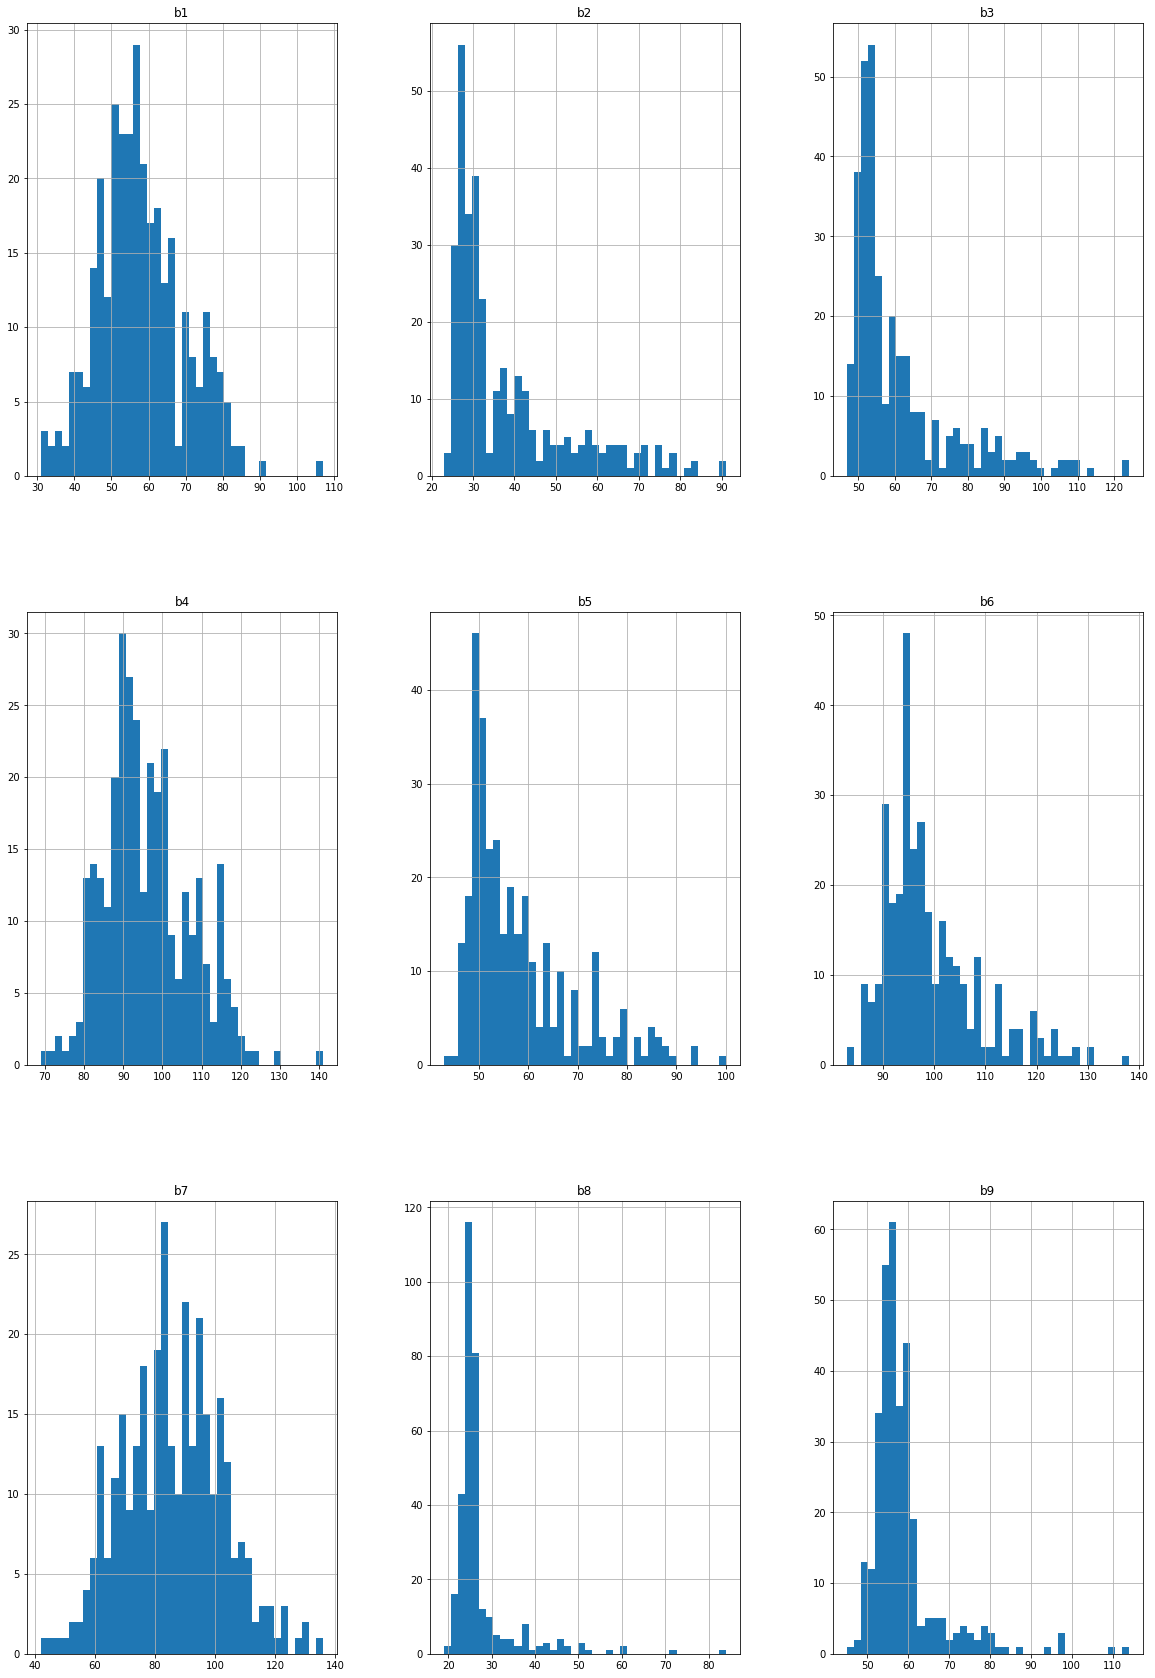

In [17]:
data_train.hist(bins=40, figsize=(20,30))
plt.show()

## Looking at the test set

In [18]:
data_pre_test = pd.read_csv("data_as1/testing.csv")

In [19]:
attributes = ['class','b1','b2','b3','b4','b5','b6','b7','b8','b9']
data_test = data_pre_test[attributes]

In [20]:
data_test

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9
0,d,39,36,57,91,59,101,93,27,60
1,h,84,30,57,112,51,98,92,26,62
2,s,53,25,49,99,51,93,84,26,58
3,s,59,26,49,103,47,92,82,25,56
4,d,57,49,66,103,64,106,114,28,59
...,...,...,...,...,...,...,...,...,...,...
193,d,55,61,90,75,55,91,84,24,54
194,d,66,69,93,90,63,100,99,25,57
195,h,79,30,55,115,51,96,109,25,59
196,h,69,27,53,106,47,90,87,24,55


In [21]:
len(data_test)

198

In [22]:
data_test.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9
0,d,39,36,57,91,59,101,93,27,60
1,h,84,30,57,112,51,98,92,26,62
2,s,53,25,49,99,51,93,84,26,58
3,s,59,26,49,103,47,92,82,25,56
4,d,57,49,66,103,64,106,114,28,59


<AxesSubplot:>

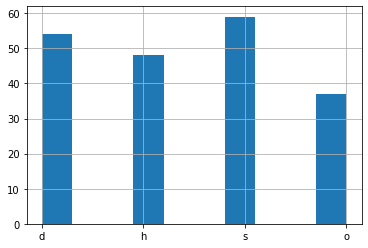

In [23]:
data_test["class"].hist()

In [24]:
data_test["class"].value_counts()

s    59
d    54
h    48
o    37
Name: class, dtype: int64

In [25]:
data_test["class"].value_counts() / len(data_test)

s    0.297980
d    0.272727
h    0.242424
o    0.186869
Name: class, dtype: float64

## Visualizing Data

<AxesSubplot:xlabel='b2', ylabel='b2'>

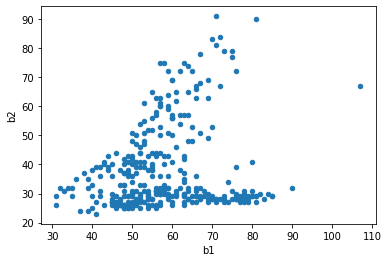

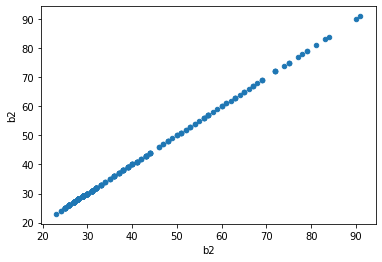

In [26]:
data.plot(kind="scatter", x="b1", y="b2")
data.plot(kind="scatter", x="b2", y="b2")

<AxesSubplot:xlabel='b2', ylabel='b2'>

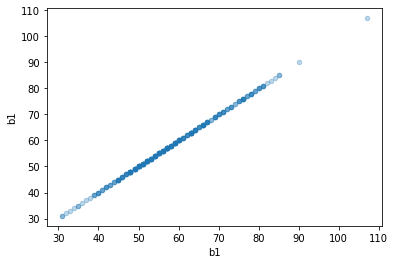

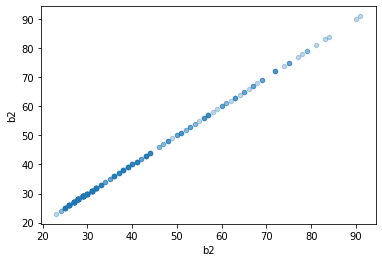

In [27]:
data.plot(kind="scatter", x="b1", y="b1", alpha = 0.3)
data.plot(kind="scatter", x="b2", y="b2", alpha = 0.3)

<AxesSubplot:xlabel='class'>

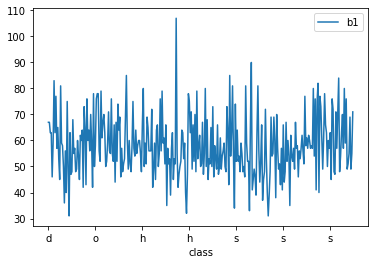

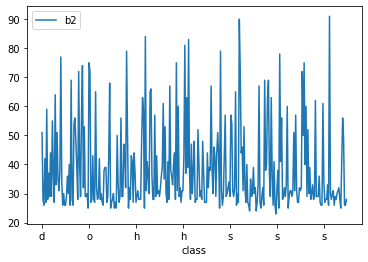

In [28]:
data.plot(kind="line", x="class", y="b1")
data.plot(kind="line", x="class", y="b2")

<AxesSubplot:xlabel='class'>

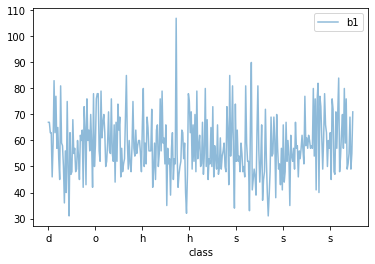

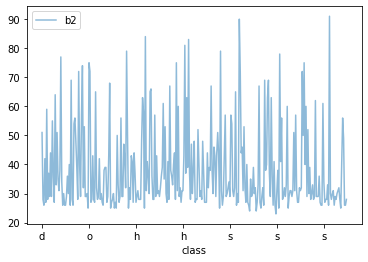

In [29]:
data.plot(kind="line", x="class", y="b1", alpha = 0.5)
data.plot(kind="line", x="class", y="b2", alpha = 0.5)

## Looking for Correlations

array([[<AxesSubplot:xlabel='b1', ylabel='b1'>,
        <AxesSubplot:xlabel='b2', ylabel='b1'>,
        <AxesSubplot:xlabel='b3', ylabel='b1'>,
        <AxesSubplot:xlabel='b4', ylabel='b1'>,
        <AxesSubplot:xlabel='b5', ylabel='b1'>,
        <AxesSubplot:xlabel='b6', ylabel='b1'>,
        <AxesSubplot:xlabel='b7', ylabel='b1'>,
        <AxesSubplot:xlabel='b8', ylabel='b1'>,
        <AxesSubplot:xlabel='b9', ylabel='b1'>],
       [<AxesSubplot:xlabel='b1', ylabel='b2'>,
        <AxesSubplot:xlabel='b2', ylabel='b2'>,
        <AxesSubplot:xlabel='b3', ylabel='b2'>,
        <AxesSubplot:xlabel='b4', ylabel='b2'>,
        <AxesSubplot:xlabel='b5', ylabel='b2'>,
        <AxesSubplot:xlabel='b6', ylabel='b2'>,
        <AxesSubplot:xlabel='b7', ylabel='b2'>,
        <AxesSubplot:xlabel='b8', ylabel='b2'>,
        <AxesSubplot:xlabel='b9', ylabel='b2'>],
       [<AxesSubplot:xlabel='b1', ylabel='b3'>,
        <AxesSubplot:xlabel='b2', ylabel='b3'>,
        <AxesSubplot:xlabel='b3', ylab

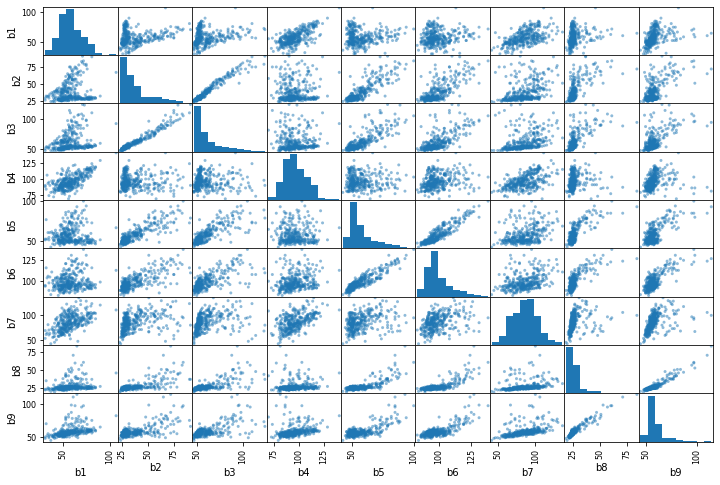

In [30]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["b1", "b2", "b3","b4", "b5", "b6","b7", "b8", "b9",
              "class"]
scatter_matrix(data[attributes], figsize=(12, 8))

(20.0, 100.0, 40.0, 140.0)

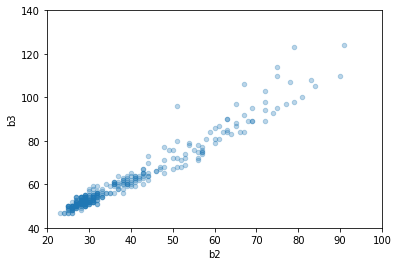

In [31]:
data.plot(kind="scatter", x="b2", y="b3",
             alpha=0.3)
plt.axis([20, 100, 40, 140])

(40.0, 100.0, 80.0, 135.0)

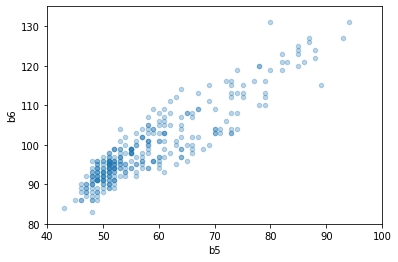

In [32]:
data.plot(kind="scatter", x="b5", y="b6",
             alpha=0.3)
plt.axis([40, 100, 80, 135])

(10.0, 90.0, 40.0, 135.0)

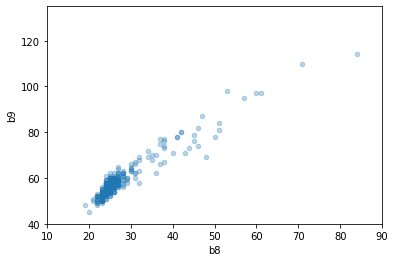

In [33]:
data.plot(kind="scatter", x="b8", y="b9",
             alpha=0.3)
plt.axis([10, 90, 40, 135])

The three graphs above infer that b2 and b3, b8 and b9, b5 and b6 are likely to be linearly related.

## Experimenting with Attribute Combinations

In [34]:
corr_matrix = data_train.corr()
corr_matrix["b2"].sort_values(ascending=False)

b2    1.000000
b3    0.973858
b5    0.856469
b6    0.742261
b8    0.693000
b9    0.639570
b7    0.371865
b1    0.193934
b4    0.007348
Name: b2, dtype: float64

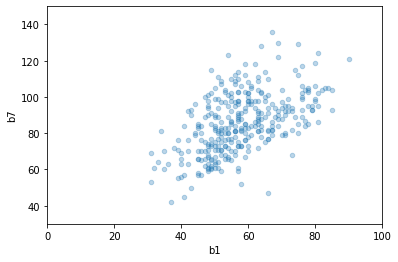

In [35]:
data_train.plot(kind="scatter", x="b1", y="b7",
             alpha=0.3)
plt.axis([0, 100, 30, 150])
plt.show()

In [36]:
data_train.describe()

,b1,b2,b3,b4,b5,b6,b7,b8,b9
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,58.021538,38.381538,61.467692,96.175385,58.098462,99.196923,85.864615,27.375385,58.880000
std,11.705076,14.589516,15.003385,11.120136,10.654920,9.438789,16.642765,7.445316,8.884777
min,31.000000,23.000000,47.000000,69.000000,43.000000,83.000000,42.000000,19.000000,45.000000
25%,50.000000,28.000000,52.000000,89.000000,51.000000,93.000000,73.000000,24.000000,54.000000
50%,57.000000,32.000000,55.000000,95.000000,54.000000,96.000000,85.000000,25.000000,57.000000
75%,65.000000,43.000000,65.000000,103.000000,63.000000,103.000000,98.000000,27.000000,60.000000
max,107.000000,91.000000,124.000000,141.000000,100.000000,138.000000,136.000000,84.000000,114.000000


## Prepare the Data for Machine Learning Algorithms

In [37]:
data_t = data_train.drop("b1", axis=1) # drop labels for training set
data_labels = data_train["b1"].copy()

In [39]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

### Data Cleaning

In [40]:
sample_incomplete_rows = data_t[data_t.isnull().any(axis=1)].head()
sample_incomplete_rows

,class,b2,b3,b4,b5,b6,b7,b8,b9


In [41]:
sample_incomplete_rows = data_train[data_train.isnull().any(axis=1)].head()
sample_incomplete_rows

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9


data_train is really the perfect dataset! It doesn't contain any NaN!

### Handling Text and Categorical Attributes

> Now let's preprocess the categorical input feature, **class**  :

In [42]:
data_class = data_train[["class"]]
data_class.head(10)

,class
0,d
1,s
2,s
3,d
4,s
5,d
6,h
7,o
8,s
9,d


In [43]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
data_class_encoded = ordinal_encoder.fit_transform(data_class)
data_class_encoded[:10]

array([[0.],
       [3.],
       [3.],
       [0.],
       [3.],
       [0.],
       [1.],
       [2.],
       [3.],
       [0.]])

In [44]:
ordinal_encoder.categories_

[array(['d', 'h', 'o', 's'], dtype=object)]

In [45]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
data_class_1hot = cat_encoder.fit_transform(data_class)
data_class_1hot

<325x4 sparse matrix of type '<class 'numpy.float64'>'
	with 325 stored elements in Compressed Sparse Row format>

> convert it to a dense array by calling the **toarray()** method

In [46]:
data_class_1hot.toarray()

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

## Transformation Pipelines

*Now let's build a pipeline for preprocessing the numerical attributes:*

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
data_num = data_train.drop("class", axis=1)
data_num_tr = num_pipeline.fit_transform(data_num)

In [48]:
data_num_tr

array([[ 0.76823994,  0.86623295,  0.43606029, ...,  3.01708854,
         0.48758236,  0.91533208],
       [ 0.76823994, -0.71267251, -0.69876454, ..., -0.23256801,
        -0.1850164 ,  0.01352708],
       [ 0.42598088, -0.84996863, -0.76551894, ..., -0.29274684,
        -0.1850164 , -0.21192418],
       ...,
       [-0.7719258 , -0.84996863, -0.89902774, ..., -1.43614451,
        -0.72309541, -0.66282668],
       [-0.25853722, -0.84996863, -0.63201013, ..., -1.25560804,
        -0.58857565, -0.3246498 ],
       [ 1.11049899, -0.71267251, -0.69876454, ...,  0.36922024,
        -0.31953615, -0.09919855]])

In [49]:
from sklearn.compose import ColumnTransformer

num_attribs = list(data_num)
cat_attribs = ["class"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

data_prepared = full_pipeline.fit_transform(data_train)

In [50]:
data_prepared

array([[ 0.76823994,  0.86623295,  0.43606029, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.76823994, -0.71267251, -0.69876454, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.42598088, -0.84996863, -0.76551894, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.7719258 , -0.84996863, -0.89902774, ...,  0.        ,
         0.        ,  1.        ],
       [-0.25853722, -0.84996863, -0.63201013, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.11049899, -0.71267251, -0.69876454, ...,  1.        ,
         0.        ,  0.        ]])

In [51]:
data_prepared.shape

(325, 13)

## Select and Train a Model

### Training and Evaluating on the Training Set

In [52]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(data_prepared, data_labels)

LinearRegression()

In [53]:
# let's try the full preprocessing pipeline on a few training instances
some_data = data_train.iloc[:5]
some_labels = data_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [67. 67. 63. 63. 46.]


*Compare against the actual values:*

In [54]:
print("Labels:", list(some_labels))

Labels: [67, 67, 63, 63, 46]


In [55]:
some_data_prepared

array([[ 0.76823994,  0.86623295,  0.43606029,  1.69545084,  1.02472372,
         1.25241468,  3.01708854,  0.48758236,  0.91533208,  1.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.76823994, -0.71267251, -0.69876454,  0.25440076, -0.76123986,
        -0.23311368, -0.23256801, -0.1850164 ,  0.01352708,  0.        ,
         0.        ,  0.        ,  1.        ],
       [ 0.42598088, -0.84996863, -0.76551894, -0.10586176, -0.85523794,
        -0.8697687 , -0.29274684, -0.1850164 , -0.21192418,  0.        ,
         0.        ,  0.        ,  1.        ],
       [ 0.42598088,  0.24840038,  0.10228828,  0.0742695 ,  0.74272947,
         0.93408718,  1.51261791,  0.08402311,  0.01352708,  1.        ,
         0.        ,  0.        ,  0.        ],
       [-1.02862009, -0.78132057, -0.76551894, -1.18664931, -0.66724178,
        -0.97587787, -0.59364096, -0.1850164 , -0.3246498 ,  0.        ,
         0.        ,  0.        ,  1.        ]])

In [56]:
from sklearn.metrics import mean_squared_error

data_predictions = lin_reg.predict(data_prepared)
lin_mse = mean_squared_error(data_labels, data_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

9.370630404419532e-15

**Note** We also can check *mean_squared_error* at the same time.

**Calculate mean_absolute_error**

In [57]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(data_labels, data_predictions)
lin_mae

4.164873574224587e-15

**Using decision tree to calculate the error**

In [58]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(data_prepared, data_labels)

DecisionTreeRegressor(random_state=42)

In [59]:
data_predictions = tree_reg.predict(data_prepared)
tree_mse = mean_squared_error(data_labels, data_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## Using Cross-Validation for Better Evaluation

In [60]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, data_prepared, data_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [61]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.24618298 0.30151134 0.         0.         2.96954236 0.1767767
 1.42521928 0.39528471 0.25       0.1767767 ]
Mean: 0.5941294064399414
Standard deviation: 0.8804714335928339


In [62]:
lin_scores = cross_val_score(lin_reg, data_prepared,data_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [4.10232040e-15 2.76854825e-14 1.23689614e-14 9.58095629e-15
 9.35881752e-15 7.32410688e-15 3.55271368e-15 6.87980046e-15
 1.56379948e-14 1.34112000e-14]
Mean: 1.099023539267601e-14
Standard deviation: 6.6771158911472766e-15


In [63]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=1212)
forest_reg.fit(data_prepared, data_labels)

RandomForestRegressor(random_state=1212)

In [64]:
data_predictions = forest_reg.predict(data_prepared)
forest_mse = mean_squared_error(data_labels, data_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.4482780730408644

In [65]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, data_prepared, data_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.42990485 0.10757661 0.42647605 0.31428611 3.42769248 0.32902318
 1.05581722 0.43744643 0.2072212  0.07346343]
Mean: 0.6808907544743422
Standard deviation: 0.9514570495896201


In [66]:
scores = cross_val_score(lin_reg, data_prepared, data_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    1.000000e+01
mean     1.099024e-14
std      7.038298e-15
min      3.552714e-15
25%      6.990877e-15
50%      9.469887e-15
75%      1.315064e-14
max      2.768548e-14
dtype: float64

> Using svm

In [67]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(data_prepared, data_labels)
data_predictions = svm_reg.predict(data_prepared)
svm_mse = mean_squared_error(data_labels, data_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

0.0527966452714228

## Fine-Tune the model

### Grid Search

In [68]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=1212)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(data_prepared, data_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1212),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

**The best hyperparameter combination found:**

In [69]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [70]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=1212)

**Looking at the scores:**

In [71]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

5.387259424100913 {'max_features': 2, 'n_estimators': 3}
4.405255602468139 {'max_features': 2, 'n_estimators': 10}
4.17923724280208 {'max_features': 2, 'n_estimators': 30}
3.9767271687103425 {'max_features': 4, 'n_estimators': 3}
3.168299713872265 {'max_features': 4, 'n_estimators': 10}
2.9805110558167964 {'max_features': 4, 'n_estimators': 30}
3.886949455341048 {'max_features': 6, 'n_estimators': 3}
2.5076130237584664 {'max_features': 6, 'n_estimators': 10}
2.3437759001417926 {'max_features': 6, 'n_estimators': 30}
2.381983659441465 {'max_features': 8, 'n_estimators': 3}
1.7746592305610065 {'max_features': 8, 'n_estimators': 10}
1.6499583004313756 {'max_features': 8, 'n_estimators': 30}
5.643784872964923 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
4.158698021108197 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
4.645409460944111 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
3.600205122361353 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [72]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005531,0.000811,0.001154,0.000242,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-26.911111,-15.369231,...,-29.022564,9.054726,17,-7.761966,-8.858120,-5.292735,-7.705128,-5.478205,-7.019231,1.397081
1,0.012744,0.000118,0.001496,0.000055,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-12.756769,-9.009077,...,-19.406277,9.870611,15,-4.114077,-3.563654,-2.735462,-3.242192,-2.897385,-3.310554,0.493117
2,0.036078,0.000146,0.003204,0.000056,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-9.150085,-7.231487,...,-17.466024,10.340966,14,-2.587906,-2.397030,-1.790329,-2.564603,-2.629910,-2.393956,0.312021
3,0.004724,0.000068,0.000881,0.000042,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-9.143590,-10.924786,...,-15.814359,7.151011,12,-4.652564,-6.749145,-6.420085,-3.964957,-4.423077,-5.241966,1.123235
4,0.013581,0.000193,0.001475,0.000054,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-5.089385,-4.854923,...,-10.038123,6.459389,8,-2.195385,-2.468269,-2.059000,-1.749538,-1.663615,-2.027162,0.294323
5,0.038658,0.000395,0.003164,0.000058,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-3.360752,-2.655453,...,-8.883446,6.999614,6,-1.182748,-1.226902,-1.003906,-1.440372,-1.323440,-1.235474,0.145738
6,0.004867,0.000051,0.000830,0.000005,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-7.275214,-4.471795,...,-15.108376,8.337198,11,-5.767094,-6.350000,-3.182479,-4.333333,-3.477350,-4.622051,1.246033
7,0.014052,0.000083,0.001436,0.000010,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.028769,-1.718000,...,-6.288123,4.898508,5,-1.803923,-1.737808,-0.706308,-0.959385,-0.973346,-1.236154,0.447309
8,0.040610,0.000568,0.003271,0.000235,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.109692,-1.541521,...,-5.493285,4.146904,3,-0.867564,-0.775769,-0.472068,-0.838218,-0.850453,-0.760815,0.147662
9,0.005047,0.000093,0.000844,0.000036,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-4.841026,-2.842735,...,-5.673846,2.648890,4,-2.304274,-3.498291,-0.695726,-2.811538,-1.721795,-2.206325,0.955168


### Randomized Search

In [73]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=1212)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=1212)
rnd_search.fit(data_prepared, data_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1212),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc92921b6d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc929340610>},
                   random_state=1212, scoring='neg_mean_squared_error')

In [74]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

4.741811150181135 {'max_features': 1, 'n_estimators': 155}
1.8877412454984293 {'max_features': 7, 'n_estimators': 67}
4.780392595080965 {'max_features': 1, 'n_estimators': 102}
2.1726091005273287 {'max_features': 6, 'n_estimators': 106}
4.1769800670312955 {'max_features': 2, 'n_estimators': 28}
3.4569406216390903 {'max_features': 3, 'n_estimators': 40}
2.11004961533397 {'max_features': 6, 'n_estimators': 191}
1.9330631503910598 {'max_features': 7, 'n_estimators': 18}
4.028904932288707 {'max_features': 2, 'n_estimators': 85}
3.9695756661132524 {'max_features': 2, 'n_estimators': 149}


### Analyze the Models and Their Errors ( Find out the best model )

In [75]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.74822678, 0.00707298, 0.00418331, 0.09220302, 0.0034231 ,
       0.00554949, 0.01167289, 0.00575894, 0.08125418, 0.00639468,
       0.02903839, 0.00184953, 0.0033727 ])

In [76]:
extra_attribs = ["extra1", "extra2", "extra3"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.7482267774343526, 'b1'),
 (0.09220302262934985, 'b4'),
 (0.0812541846355136, 'b9'),
 (0.02903838602844345, 'extra2'),
 (0.011672893574678916, 'b7'),
 (0.007072984837589887, 'b2'),
 (0.0063946806114719154, 'extra1'),
 (0.005758943096012668, 'b8'),
 (0.005549488016815187, 'b6'),
 (0.004183313235986722, 'b3'),
 (0.003423095917147289, 'b5'),
 (0.00337269875350524, 'd'),
 (0.0018495312291325154, 'extra3')]

### Using the Test Set to Evaluate The System

In [77]:
data_te = data_test.drop("b1", axis=1) # drop labels for training set
data_tlabels = data_test["b1"].copy()

In [78]:
final_model = grid_search.best_estimator_

X_test = data_test
y_test = data_test["b1"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [79]:
final_rmse

1.57856005646027

> compute a 95% confidence interval for the test RMSE:

In [80]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))


array([0.32359303, 2.20884387])

> Using z-scores rather than t-scores:

In [81]:
m = len(squared_errors)
mean = squared_errors.mean()
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(0.34551025378169137, 2.205521790469415)

## Using Extra material

### A full pipeline with both preparation and prediction

In [82]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(data_train, data_labels)
full_pipeline_with_predictor.predict(some_data)

array([67., 67., 63., 63., 46.])

### Model persistence using joblib

In [83]:
my_model = full_pipeline_with_predictor

In [84]:
import joblib
joblib.dump(my_model, "my_model.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl") # DIFF

### SciPy distribution ( Example )

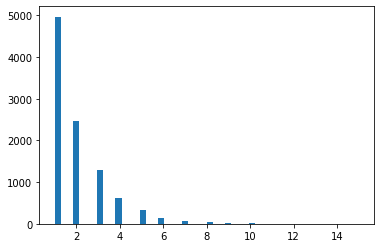

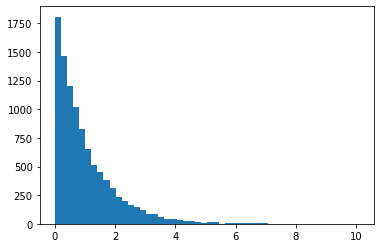

In [85]:
from scipy.stats import geom, expon
geom_distrib=geom(0.5).rvs(10000, random_state=1212)
expon_distrib=expon(scale=1).rvs(10000, random_state=1212)
plt.hist(geom_distrib, bins=50)
plt.show()
plt.hist(expon_distrib, bins=50)
plt.show()